#Boosting


Boosting (originally called hypothesis boosting) refers to any Ensemble method that
can combine several weak learners into a strong learner. The general idea of most
boosting methods is to train predictors sequentially, each trying to correct its prede‐
cessor. There are many boosting methods available, but by far the most popular are AdaBoost (short for Adaptive Boosting) and Gradient Boosting.

##AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention
to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by AdaBoost.
For example, to build an AdaBoost classifier, a first base classifier (such as a Decision
Tree) is trained and used to make predictions on the training set. The relative weight
of misclassified training instances is then increased. A second classifier is trained
using the updated weights and again it makes predictions on the training set, weights
are updated, and so on, see Figure

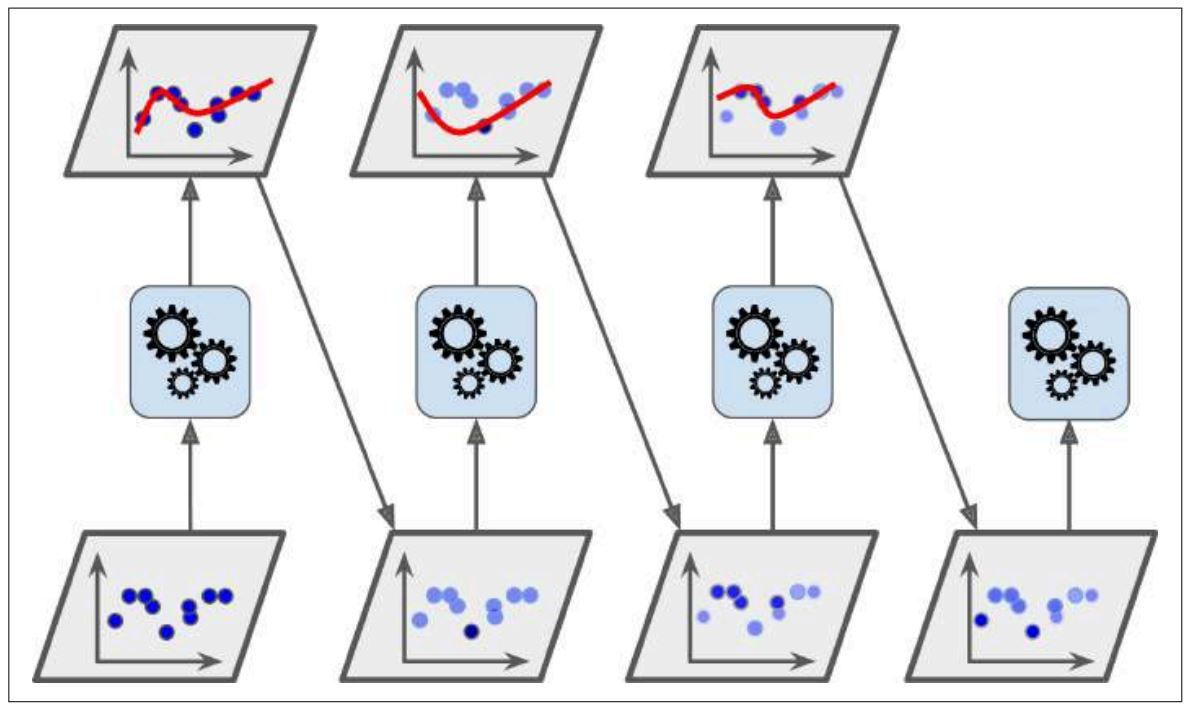

the decision boundaries of five consecutive predictors on the
moons dataset (in this example, each predictor is a highly regularized SVM classifier
with an RBF kernel14). The first classifier gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and
so on. The plot on the right represents the same sequence of predictors except that
the learning rate is halved (i.e., the misclassified instance weights are boosted half as
much at every iteration). As you can see, this sequential learning technique has some
similarities with Gradient Descent, except that instead of tweaking a single predictor’s
parameters to minimize a cost function, AdaBoost adds predictors to the ensemble,
gradually making it better.

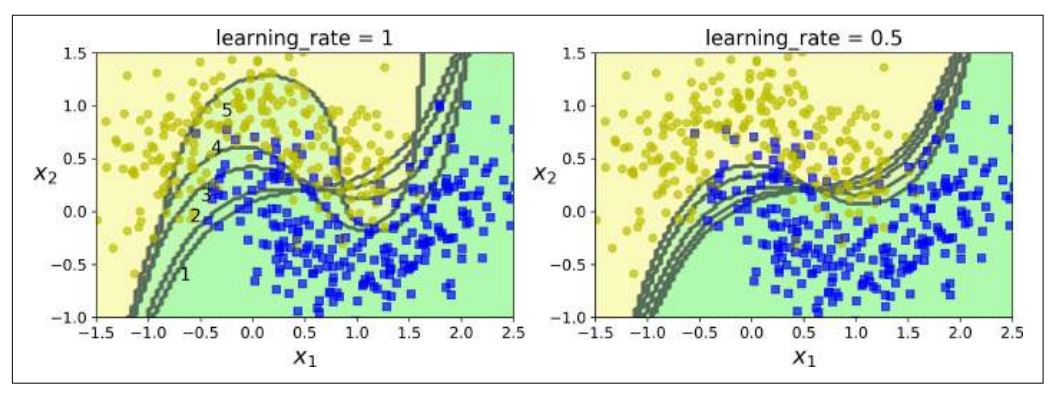

**Learning Rate 1:**The decision boundary with a learning rate of 1 appears more complex and intricate. This is likely due to the aggressive updates to the classifier weights, leading to a more detailed and potentially overfitted model. The decision boundary might exhibit more sharp turns and fluctuations.

**Learning Rate 0.5:** The decision boundary with a learning rate of 0.5 is generally smoother and less complex. This is because the updates to the classifier weights are more gradual, allowing the model to generalize better to unseen data. The decision boundary might have fewer sharp turns and appear more consistent.

##Gradient Boosting


Another very popular Boosting algorithm is Gradient Boosting.
Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

Let’s go through a simple regression example using Decision Trees as the base predic‐
tors (of course Gradient Boosting also works great with regression tasks). This is
called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT).

Figure below represents the predictions of these three trees in the left column, and the
ensemble’s predictions in the right column. In the first row, the ensemble has just one
tree, so its predictions are exactly the same as the first tree’s predictions. In the second
row, a new tree is trained on the residual errors of the first tree. On the right you can
see that the ensemble’s predictions are equal to the sum of the predictions of the first
two trees. Similarly, in the third row another tree is trained on the residual errors of
the second tree. You can see that the ensemble’s predictions gradually get better as
trees are added to the ensemble.



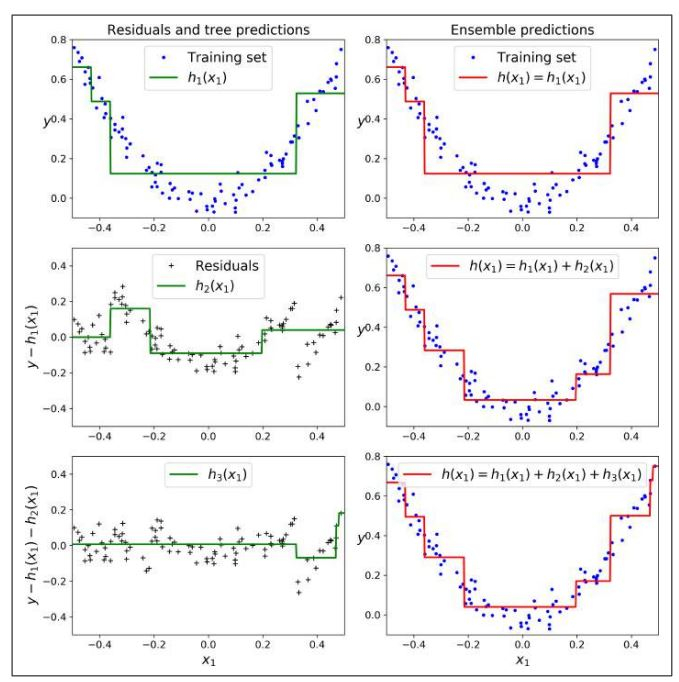

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRegressor class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on),
as well as hyperparameters to control the ensemble training, such as the number of
trees (n_estimators).

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X, y)


GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

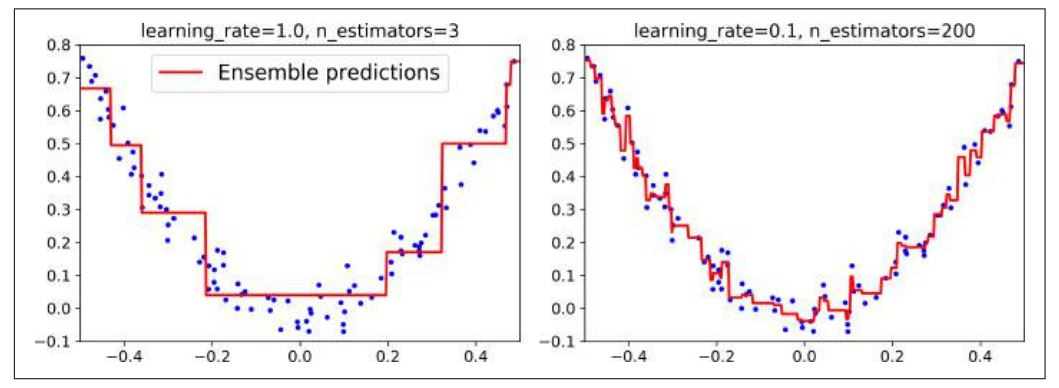

Key Observations:

**Learning Rate 1.0:** The left plot shows the ensemble predictions with a learning rate of 1.0 and only 3 estimators. The model appears to be underfitting the training data, as the predictions are not smooth enough to capture the underlying pattern. This is because each tree contributes significantly to the final prediction, and with only 3 trees, the model is not complex enough.

**Learning Rate 0.1:** The right plot shows the ensemble predictions with a learning rate of 0.1 and 200 estimators. The model appears to be overfitting the training data, as the predictions are too complex and follow the training data too closely. This is because the low learning rate causes each tree to contribute less to the final prediction, allowing the ensemble to fit the training data more precisely but potentially leading to overfitting.

Adjust **learning rate and number of trees:** Finding the right balance between these two factors is crucial for achieving optimal performance in GBRT models.